In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings
import pickle
from sklearn.model_selection import train_test_split


In [2]:
path = r"C:\Users\Nasim\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 2 - Metaprotein\Metaprotein_50.csv"
df = pd.read_csv(path)
df.head(10)

,25,36,81,128,171,237,1251,1254,2499,13,...,370,698,702,827,838,1227,1645,21,23,Patient.Type
0,151,6,28,21,15,15,8,6,30,38,...,2,379,167,26,50,6,42,82,0,C
1,41,10,52,37,21,16,11,4,99,23,...,5,306,136,8,7,3,26,30,4,C
2,23,19,37,13,7,8,5,1,108,1001,...,0,128,64,2,10,2,0,33,0,C
3,286,8,87,21,14,12,2,2,79,749,...,6,281,136,4,27,1,24,35,0,C
4,34,29,59,65,39,6,3,2,37,215,...,13,159,0,12,23,0,18,57,0,C
5,69,40,83,20,16,11,4,2,67,442,...,3,237,111,6,22,2,14,65,6,C
6,92,36,70,11,10,9,5,2,70,457,...,5,304,96,6,14,2,13,44,5,C
7,112,40,72,22,10,7,5,2,40,452,...,5,245,62,0,0,2,16,0,4,C
8,44,72,73,340,151,13,5,3,97,325,...,3,370,168,38,10,1,63,54,0,C
9,52,53,68,389,113,16,5,2,87,405,...,4,317,167,28,19,2,31,44,2,C


In [3]:
df.shape

(48, 51)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   25            48 non-null     int64 
 1   36            48 non-null     int64 
 2   81            48 non-null     int64 
 3   128           48 non-null     int64 
 4   171           48 non-null     int64 
 5   237           48 non-null     int64 
 6   1251          48 non-null     int64 
 7   1254          48 non-null     int64 
 8   2499          48 non-null     int64 
 9   13            48 non-null     int64 
 10  19            48 non-null     int64 
 11  141           48 non-null     int64 
 12  158           48 non-null     int64 
 13  170           48 non-null     int64 
 14  1247          48 non-null     int64 
 15  2779          48 non-null     int64 
 16  28            48 non-null     int64 
 17  179           48 non-null     int64 
 18  1173          48 non-null     int64 
 19  1249      

In [61]:
df.values

array([[151, 6, 28, ..., 82, 0, 'C'],
       [41, 10, 52, ..., 30, 4, 'C'],
       [23, 19, 37, ..., 33, 0, 'C'],
       ...,
       [369, 97, 117, ..., 276, 367, 'UC'],
       [51, 4, 37, ..., 332, 3, 'UC'],
       [503, 412, 250, ..., 232, 966, 'UC']], dtype=object)

In [62]:
df.describe()

,25,36,81,128,171,237,1251,1254,2499,13,...,294,370,698,702,827,838,1227,1645,21,23
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,286.583333,243.333333,119.708333,167.750000,77.687500,24.937500,6.791667,4.750000,45.333333,317.958333,...,18.458333,10.583333,201.000000,85.479167,13.166667,18.604167,4.166667,29.270833,264.604167,397.729167
std,241.160919,599.039669,83.193432,231.891987,104.199513,17.518873,3.114539,2.906339,37.330800,307.422570,...,18.103671,9.409894,144.379229,59.812825,10.623806,13.044506,3.915780,20.418744,305.356139,770.178005
min,23.000000,2.000000,7.000000,7.000000,6.000000,4.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.750000,23.500000,60.500000,21.000000,14.750000,11.000000,5.000000,2.000000,19.000000,59.750000,...,5.000000,3.750000,63.250000,32.750000,5.000000,8.000000,2.000000,15.500000,43.500000,3.000000
50%,221.500000,53.500000,86.500000,82.000000,47.500000,20.500000,6.000000,4.000000,24.500000,197.500000,...,12.000000,7.500000,203.000000,89.500000,11.000000,16.500000,2.000000,26.000000,130.500000,20.500000
75%,485.500000,133.250000,169.750000,163.750000,88.500000,32.250000,8.000000,6.000000,79.000000,472.750000,...,26.250000,15.250000,304.500000,135.250000,19.250000,26.250000,6.000000,42.250000,332.500000,390.000000
max,938.000000,2624.000000,384.000000,915.000000,439.000000,68.000000,19.000000,12.000000,132.000000,1243.000000,...,62.000000,37.000000,503.000000,193.000000,43.000000,50.000000,17.000000,70.000000,1240.000000,3626.000000


In [63]:
df.columns

Index(['25', '36', '81', '128', '171', '237', '1251', '1254', '2499', '13',
       '19', '141', '158', '170', '1247', '2779', '28', '179', '1173', '1249',
       '1774', '2823', '20', '145', '175', '318', '366', '379', '577', '732',
       '735', '1245', '2555', '107', '280', '378', '443', '1225', '1261',
       '111', '294', '370', '698', '702', '827', '838', '1227', '1645', '21',
       '23', 'Patient.Type'],
      dtype='object')

In [64]:
df['Patient.Type']

0      C
1      C
2      C
3      C
4      C
5      C
6      C
7      C
8      C
9      C
10     C
11     C
12     C
13     C
14     C
15     C
16     C
17     C
18     C
19     C
20    CD
21    CD
22    CD
23    CD
24    CD
25    CD
26    CD
27    CD
28    CD
29    CD
30    CD
31    CD
32    CD
33    UC
34    UC
35    UC
36    UC
37    UC
38    UC
39    UC
40    UC
41    UC
42    UC
43    UC
44    UC
45    UC
46    UC
47    UC
Name: Patient.Type, dtype: object

In [7]:
df['Patient.Type'].value_counts()

C     20
UC    15
CD    13
Name: Patient.Type, dtype: int64

C:\Users\Nasim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


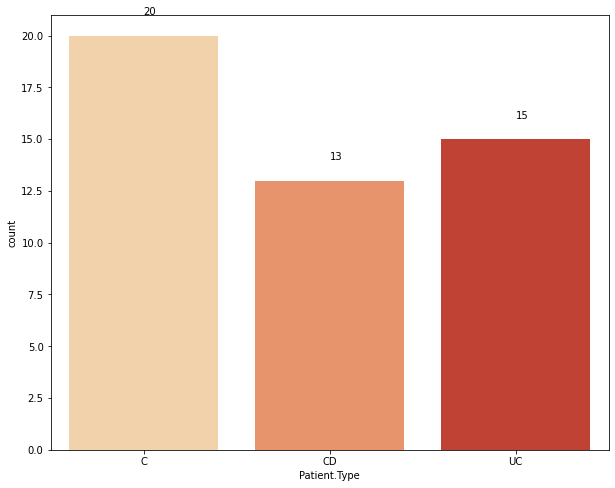

In [8]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['Patient.Type'], palette='OrRd')
ax.set_xticklabels(['C','CD','UC'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

In [9]:
x = df.iloc[:,:-1]
x

,25,36,81,128,171,237,1251,1254,2499,13,...,294,370,698,702,827,838,1227,1645,21,23
0,151,6,28,21,15,15,8,6,30,38,...,31,2,379,167,26,50,6,42,82,0
1,41,10,52,37,21,16,11,4,99,23,...,0,5,306,136,8,7,3,26,30,4
2,23,19,37,13,7,8,5,1,108,1001,...,2,0,128,64,2,10,2,0,33,0
3,286,8,87,21,14,12,2,2,79,749,...,0,6,281,136,4,27,1,24,35,0
4,34,29,59,65,39,6,3,2,37,215,...,3,13,159,0,12,23,0,18,57,0
5,69,40,83,20,16,11,4,2,67,442,...,6,3,237,111,6,22,2,14,65,6
6,92,36,70,11,10,9,5,2,70,457,...,0,5,304,96,6,14,2,13,44,5
7,112,40,72,22,10,7,5,2,40,452,...,5,5,245,62,0,0,2,16,0,4
8,44,72,73,340,151,13,5,3,97,325,...,1,3,370,168,38,10,1,63,54,0
9,52,53,68,389,113,16,5,2,87,405,...,1,4,317,167,28,19,2,31,44,2


In [10]:
y = df.iloc[:,-1]

Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import plot_tree
from timeit import default_timer as timer

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,stratify=y)

In [71]:
DT = DecisionTreeClassifier(criterion="entropy")
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print('DecisionTree  accuracy %s' % accuracy_score(y_test, y_pred))

DecisionTree  accuracy 0.75


In [72]:
results = confusion_matrix(y_test, y_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  5
TP  2
FN  0
FP  0
[[5 0 0]
 [0 2 1]
 [0 2 2]]


Confusion matrix, without normalization
[[5 0 0]
 [0 2 1]
 [0 2 2]]


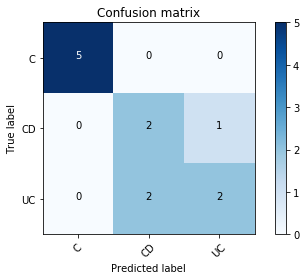

In [73]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

In [74]:
DT = DecisionTreeClassifier(criterion="gini")
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print('DecisionTree  accuracy %s' % accuracy_score(y_test, y_pred))

DecisionTree  accuracy 0.75


In [75]:
results = confusion_matrix(y_test, y_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  5
TP  2
FN  0
FP  0
[[5 0 0]
 [0 2 1]
 [0 2 2]]


Confusion matrix, without normalization
[[5 0 0]
 [0 2 1]
 [0 2 2]]


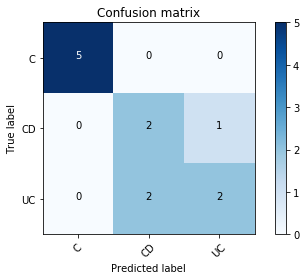

In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

Decision tree on separate training and test data

In [13]:
path = r"C:\Users\Nasim\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 2 - Metaprotein\Training Set.csv"
dfTrain = pd.read_csv(path)
dfTrain.head(10)


,X25,X36,X81,X128,X171,X237,X1251,X1254,X2499,X13,...,X370,X698,X702,X827,X838,X1227,X1645,X21,X23,Patient.Type
0,354,116,73,527,160,26,5,3,132,1243,...,7,225,111,1,8,2,37,0,21,C
1,133,2624,209,902,419,30,10,8,25,391,...,37,65,36,27,16,12,34,773,1192,CD
2,569,35,61,105,44,11,8,3,105,520,...,7,357,123,2,0,2,35,54,29,C
3,34,29,59,65,39,6,3,2,37,215,...,13,159,0,12,23,0,18,57,0,C
4,133,204,169,82,45,61,19,11,21,60,...,20,174,56,17,32,8,68,247,267,UC
5,168,84,161,102,52,33,8,8,17,179,...,19,38,12,5,8,17,28,836,187,UC
6,115,2509,180,896,439,28,10,10,19,341,...,24,46,17,20,6,15,27,779,1084,CD
7,542,179,102,67,70,23,8,4,9,8,...,17,43,0,8,14,6,22,304,796,UC
8,484,56,61,64,24,12,5,3,1,890,...,10,231,87,6,8,1,10,0,11,C
9,911,116,144,127,68,40,8,6,19,35,...,19,128,92,19,40,6,8,274,2590,CD


In [14]:
dfTrain['Patient.Type'].value_counts()

C     10
UC     7
CD     7
Name: Patient.Type, dtype: int64

In [15]:
x_train = dfTrain.iloc[:,:-1]

In [16]:
y_train = dfTrain.iloc[:,-1]

In [17]:
path = r"C:\Users\Nasim\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 2 - Metaprotein\Testing Set.csv"
dfTest = pd.read_csv(path)
dfTest.head(10)

,X25,X36,X81,X128,X171,X237,X1251,X1254,X2499,X13,...,X370,X698,X702,X827,X838,X1227,X1645,X21,X23,Patient.Type
0,151,6,28,21,15,15,8,6,30,38,...,2,379,167,26,50,6,42,82,0,C
1,23,19,37,13,7,8,5,1,108,1001,...,0,128,64,2,10,2,0,33,0,C
2,286,8,87,21,14,12,2,2,79,749,...,6,281,136,4,27,1,24,35,0,C
3,112,40,72,22,10,7,5,2,40,452,...,5,245,62,0,0,2,16,0,4,C
4,44,72,73,340,151,13,5,3,97,325,...,3,370,168,38,10,1,63,54,0,C
5,38,44,74,336,98,13,5,1,79,347,...,3,277,135,19,12,1,38,35,2,C
6,163,22,75,82,33,12,4,2,119,746,...,0,358,142,15,17,2,0,116,3,C
7,116,10,129,12,12,11,4,2,92,623,...,11,307,114,7,6,2,29,95,3,C
8,347,19,48,128,35,13,4,2,110,79,...,5,503,193,9,15,2,22,84,5,C
9,253,24,48,13,14,11,5,2,74,535,...,3,478,148,10,26,2,24,42,3,C


In [18]:
dfTest['Patient.Type'].value_counts()

C     10
UC     8
CD     6
Name: Patient.Type, dtype: int64

C:\Users\Nasim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


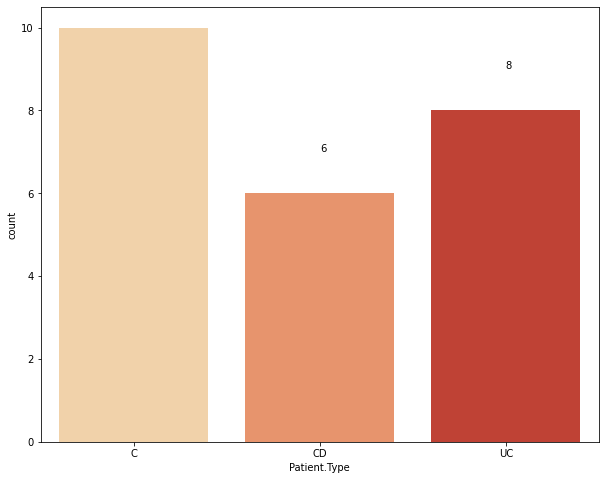

In [19]:
plt.figure(figsize=(10,8))
ax=sns.countplot(dfTest['Patient.Type'], palette='OrRd')
ax.set_xticklabels(['C','CD','UC'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

In [21]:
x_test = dfTest.iloc[:,:-1]

In [22]:
y_test = dfTest.iloc[:,-1]


In [23]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((24, 50), (24,), (24, 50), (24,))

time to generate the decision tree: 0.002617299999997158 seconds
time for the prediction: 0.0014118999999936932 seconds


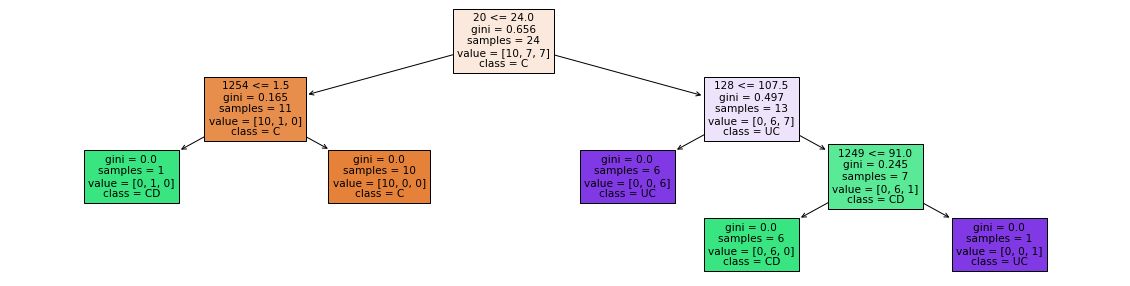

In [24]:
#time to generate the decision tree
a = timer()
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(x_train, y_train)
b = timer()
#time for the prediction
c = timer()
y_test_pred = dt.predict(x_test)
d = timer()

delta = b - a
delta1 = d - c
print("time to generate the decision tree: " + str(delta) + " seconds")
print("time for the prediction: " + str(delta1) + " seconds")


plt.figure(figsize=(20,5))
plot_tree(dt, feature_names = x.columns,class_names=['C','CD','UC'],filled=True);

In [25]:
print("Accuracy Score-Train: ",accuracy_score(y_train, y_train_pred))

NameError: name 'y_train_pred' is not defined

In [89]:
print("Accuracy Score-Test: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Test:  0.5833333333333334


Confusion matrix, without normalization
[[7 2 1]
 [0 2 4]
 [0 1 7]]


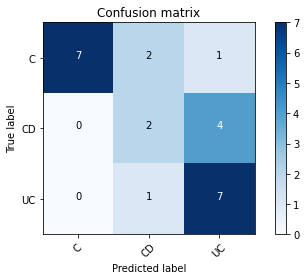

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_test_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

time to generate the decision tree: 0.0023820000000114305 seconds
time for the prediction: 0.00163359999999102 seconds


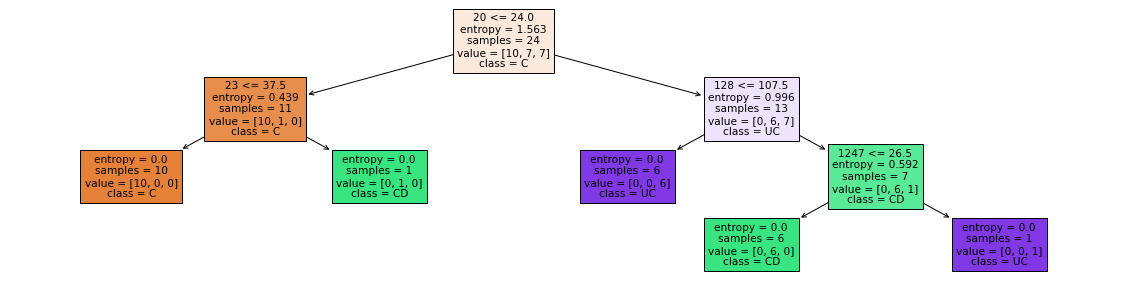

In [28]:
#time to generate the decision tree
a = timer()
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train, y_train)
b = timer()
#time for the prediction
c = timer()
y_test_pred = dt.predict(x_test)
d = timer()

delta = b - a
delta1 = d - c
print("time to generate the decision tree: " + str(delta) + " seconds")
print("time for the prediction: " + str(delta1) + " seconds")


plt.figure(figsize=(20,5))
plot_tree(dt, feature_names = x.columns,class_names=['C','CD','UC'],filled=True);

In [29]:
print("Accuracy Score-Train: ",accuracy_score(y_train, y_train_pred))

NameError: name 'y_train_pred' is not defined

In [30]:
print("Accuracy Score-Test: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Test:  0.7083333333333334


Confusion matrix, without normalization
[[9 0 1]
 [0 1 5]
 [0 1 7]]


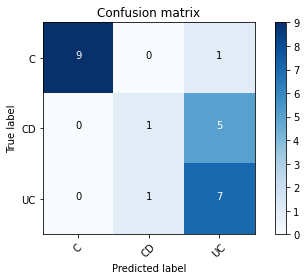

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_test_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

Pruned Trees

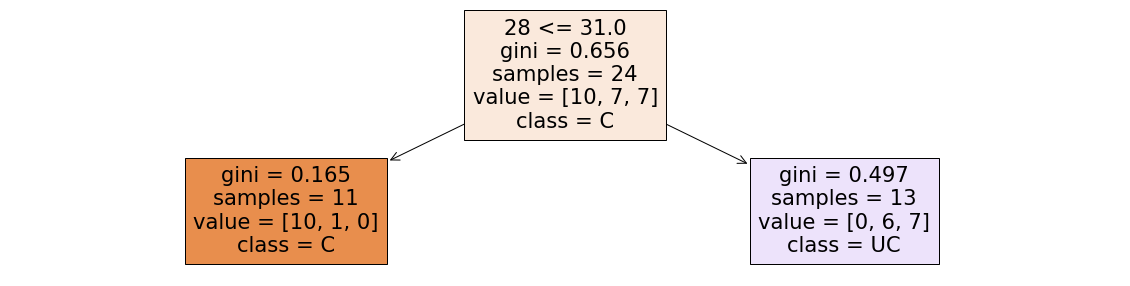

In [95]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=1)
dt.fit(x_train, y_train)

plt.figure(figsize=(20,5))
plot_tree(dt, feature_names = x.columns,class_names=['C','CD','UC'],filled=True);

Evaluating model performance

In [96]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [97]:
print("Accuracy Score-Train: ",accuracy_score(y_train, y_train_pred))

Accuracy Score-Train:  0.7083333333333334


In [98]:
print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Train:  0.7083333333333334


In [99]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  10
TP  0
FN  0
FP  0
[[10  0  0]
 [ 0  0  6]
 [ 1  0  7]]


Confusion matrix, without normalization
[[10  0  0]
 [ 0  0  6]
 [ 1  0  7]]


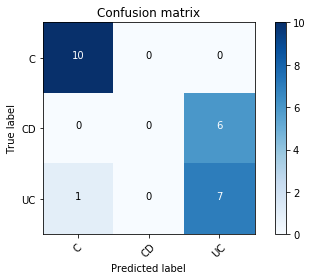

In [100]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_test_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

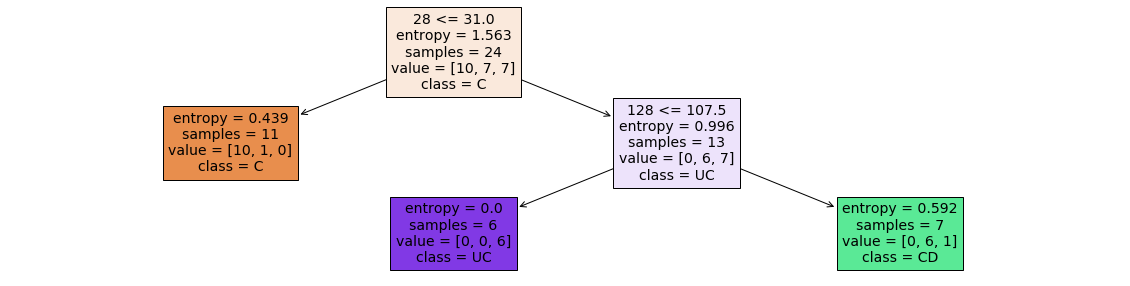

In [101]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 2, max_leaf_nodes = 3)
dt.fit(x_train, y_train)

plt.figure(figsize=(20,5))
plot_tree(dt, feature_names = x.columns,class_names=['C','CD','UC'],filled=True);

In [102]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [103]:
print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Train:  0.75


In [104]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  10
TP  2
FN  0
FP  0
[[10  0  0]
 [ 0  2  4]
 [ 1  1  6]]


Confusion matrix, without normalization
[[10  0  0]
 [ 0  2  4]
 [ 1  1  6]]


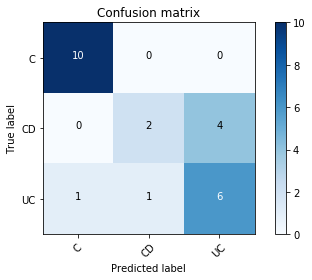

In [105]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_test_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

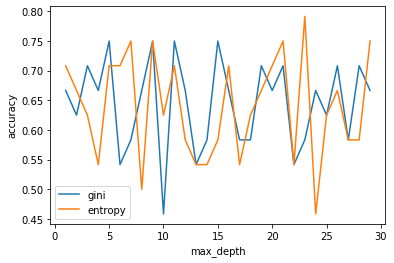

In [106]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()